In [1]:
import matplotlib.pyplot as plt

import numpy as np

In [2]:
import surp
import arya

In [3]:
fiducial = surp.ViceModel.from_saved("../../models/C11_f0.2/model.json")

In [5]:
h = fiducial.history

# Star Formation History
Should go as the two part power law

In [28]:
def sfh_model(t, tau_sfh, tau_rise):
    return np.exp(-t/tau_sfh) * (1 - np.exp(-t/tau_rise))

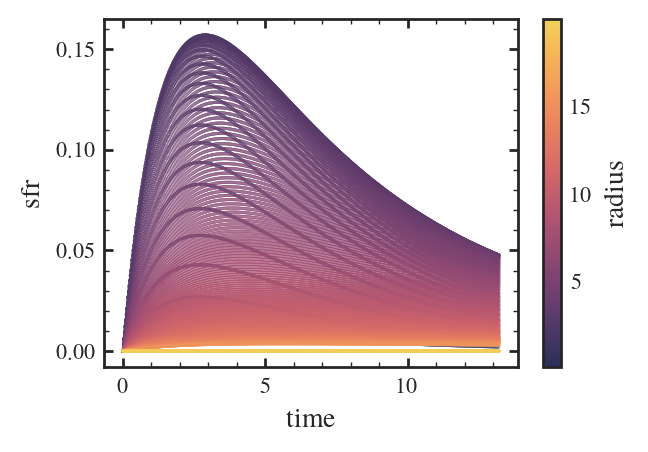

In [11]:
plt.scatter(h.time, h.sfr, c=h.R, s=0.01)
plt.xlabel("time")
plt.ylabel("sfr")
plt.colorbar(label="radius")

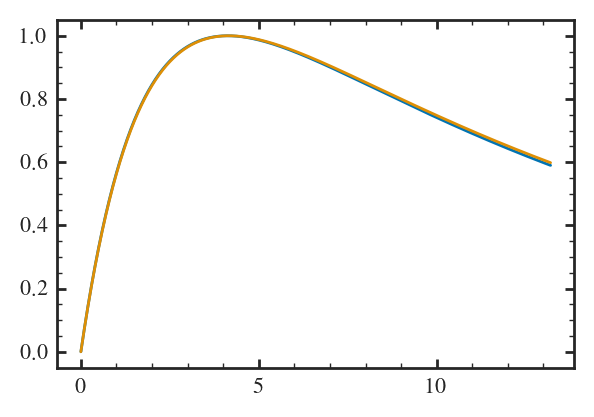

In [33]:
filt = np.isclose(h.R, 7.05)
h1 = h[filt]
plt.plot(h1.time, h1.sfr / np.max(h1.sfr))
y = sfh_model(h1.time, 14, 2)
plt.plot(h1.time, y/np.max(y) )

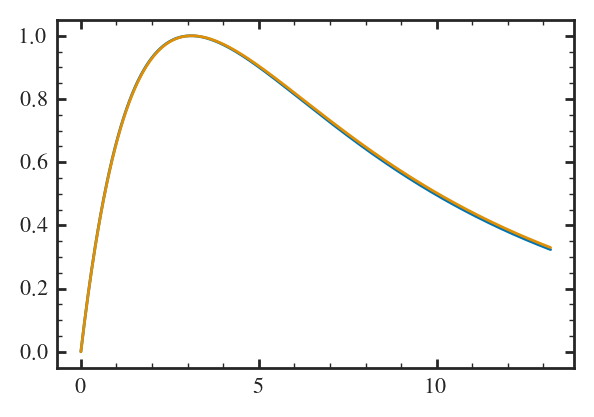

In [42]:
filt = np.isclose(h.R, 3.05)
h1 = h[filt]
plt.plot(h1.time, h1.sfr / np.max(h1.sfr))
y = sfh_model(h1.time, 7.5, 2)
plt.plot(h1.time, y/np.max(y) )

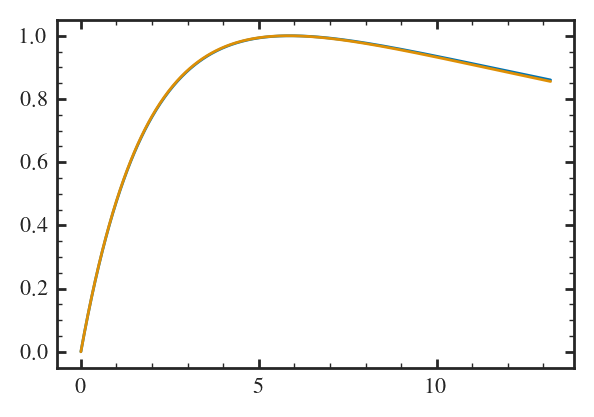

In [39]:
filt = np.isclose(h.R, 15.05)
h1 = h[filt]
plt.plot(h1.time, h1.sfr / np.max(h1.sfr))
y = sfh_model(h1.time, 35, 2)
plt.plot(h1.time, y/np.max(y) )

In [51]:
t_end = np.max(h.time)

In [52]:
h_end = h[h.time == t_end]

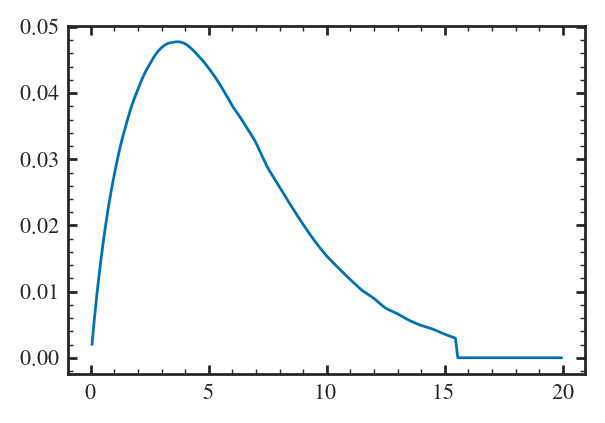

In [53]:
plt.plot(h_end.R, h_end.sfr)

In [78]:
dR = h_end.R[1] - h_end.R[0]

(100000.0, 1000000000000.0)

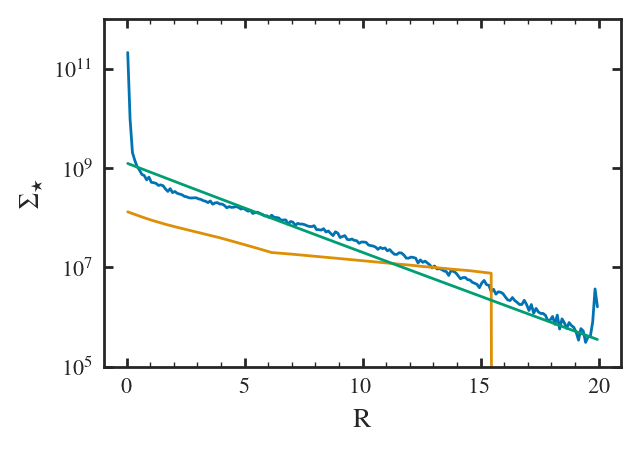

In [187]:
A = (2*np.pi * h_end.R * dR).values
plt.plot(h_end.R, h_end.mstar / A)
plt.plot(h_end.R, h_end.mgas / A)

plt.yscale("log")
#plt.xscale("log")
plt.plot(h_end.R, 1e9*(np.exp(-h_end.R / 2.5) + 0.27*np.exp(-h_end.R / 2.0)))
plt.ylabel(r"$\Sigma_\star$")
plt.xlabel("R")
plt.ylim(1e5, 1e12)

star formation densities are okay. divergence at centre is likely a result of migration but may not even be that unphysical.

In [101]:
np.sum(h_end.mstar) / 1e10 # total mass should be 5.17 x 10^10 solar masses (yay)

5.0760108453

# SFR Law

In [225]:
def KS_law(Σg):
    Σ1 = 2e7
    Σ2 = 5e6
    γ1 = 1
    γ2 = 3.6
    γ3 = 1.7
    
    C1 = Σ2**(γ3 - γ2) * Σ1**(γ2 - γ1)
    C2 = Σ2**(γ3 - γ2)
    norm = 1/2.1 / C1

    s = 0
    s += np.where(Σ1 < Σgas , C1 * Σgas ** γ1, 0)
    s += np.where((Σ2 < Σgas) & (Σgas <= Σ1), C2 * Σgas ** γ2, 0)
    s += np.where(Σgas <= Σ2, Σgas**γ3, 0)
    return norm*s

Text(0.5, 1.0, 'z = 0')

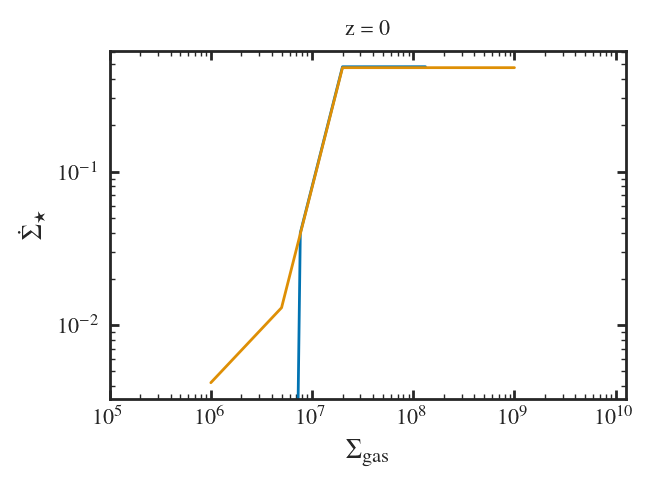

In [226]:
Σgas = h_end.mgas/A
plt.plot(Σgas, h_end.sfr / A / Σgas * 1e9)
Σgas = np.linspace(1e6, 1e9, 1000)
plt.plot(Σgas, KS_law(Σgas)/ Σgas)
plt.xlabel(r"$\Sigma_{\rm gas}$")
plt.ylabel(r"$\dot{\Sigma}_\star$")
plt.yscale("log")
plt.xscale('log')
plt.xlim(1e5)
plt.title("z = 0")

In [192]:
np.log10(2)

0.3010299956639812

In [237]:
def log_t_dep(log_z):
    At = 0.089
    Bt = -0.62
    return  Bt*log_z # ignoring offset

def t_dep_factor(z):
    return 10**log_t_dep(np.log10(1+z))

(100000.0, 12732278758.242096)

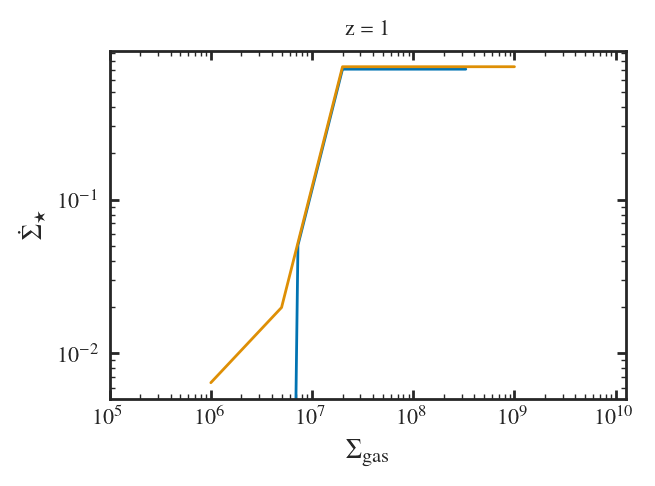

In [247]:
filt = np.isclose(h.time, 13.2 - 7.8)
h1 = h[filt]

Σgas = h1.mgas/A
plt.plot(Σgas, h1.sfr / A / Σgas * 1e9)
Σgas = np.linspace(1e6, 1e9, 1000)

plt.plot(Σgas, KS_law(Σgas)/ Σgas / t_dep_factor(1))
plt.xlabel(r"$\Sigma_{\rm gas}$")
plt.ylabel(r"$\dot{\Sigma}_\star$")
plt.yscale("log")
plt.xscale('log')
plt.title("z = 1")
plt.xlim(1e5)

(100000.0, 12732278758.242096)

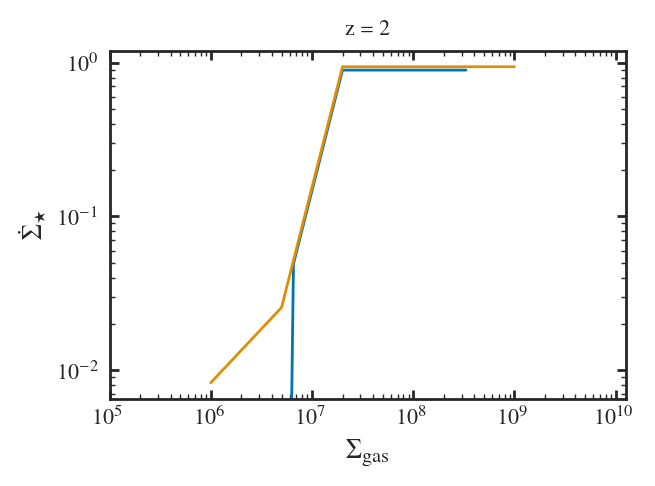

In [248]:
filt = np.isclose(h.time, 13.2 - 10.4)
h1 = h[filt]

Σgas = h1.mgas/A
plt.plot(Σgas, h1.sfr / A / Σgas * 1e9)
Σgas = np.linspace(1e6, 1e9, 1000)

plt.plot(Σgas, KS_law(Σgas)/ Σgas /  t_dep_factor(2))
plt.xlabel(r"$\Sigma_{\rm gas}$")
plt.ylabel(r"$\dot{\Sigma}_\star$")
plt.yscale("log")
plt.xscale('log')
plt.title("z = 2")
plt.xlim(1e5)

ks law verified !!!

# Outflows and yields

Text(0, 0.5, '$\\eta$')

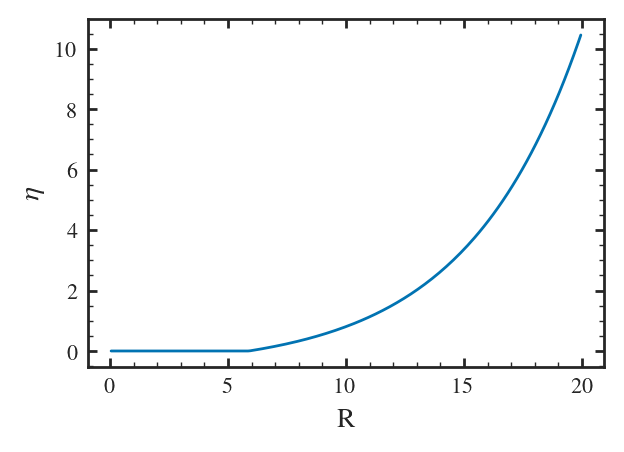

In [249]:
plt.plot(h_end.R, h_end.eta_0)
plt.xlabel("R")
plt.ylabel(r"$\eta$")

In [251]:
surp.simulation.multizone_sim.MH_grad

<module 'surp.simulation' from '/users/PAS2232/aeyobd/surp/surp/simulation/__init__.py'>

Text(0, 0.5, '[M/H]')

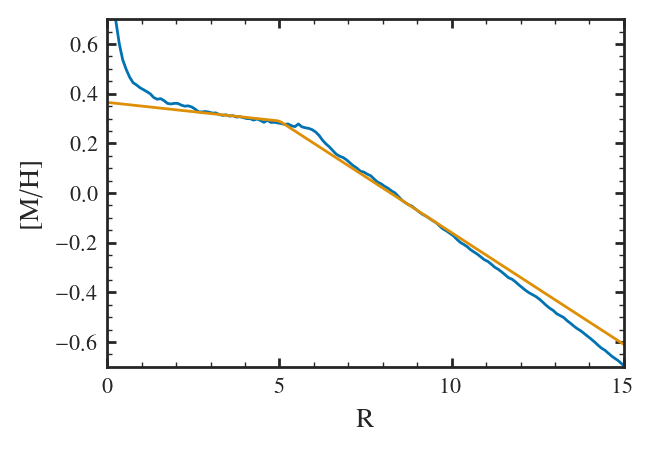

In [252]:
plt.plot(h_end.R, h_end.M_H)
y = surp.simulation.multizone_sim.MH_grad(h_end.R)
plt.plot(h_end.R, y)

plt.xlim(0, 15)
plt.ylim(-0.7, 0.7)
plt.xlabel("R")
plt.ylabel(r"[M/H]")